#Decision Tree Classifier 

###Importing necessary libraries 

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt  
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


##Loading DataSets

####About DataSet:
This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [2]:
col_names = [ 'preg', 'plas', 'bp', 'skin', 'insulin', 'bmi', 'pedi', 'age', 'class' ]
df = pd.read_csv('/content/drive/My Drive/DataSets/pima-indians-diabetes.csv', header = None , names = col_names)
df

,preg,plas,bp,skin,insulin,bmi,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isna().sum(axis = 0)

preg       0
plas       0
bp         0
skin       0
insulin    0
bmi        0
pedi       0
age        0
class      0
dtype: int64

In [4]:
df.describe()

,preg,plas,bp,skin,insulin,bmi,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.corr()

,preg,plas,bp,skin,insulin,bmi,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


##Feature Extraction

Since, skin thickness and bp are not highly correlated to our class column. So, we ignore these features

In [13]:
data = df[['preg', 'plas', 'insulin', 'bmi', 'pedi', 'age', 'class']]


##Before Scaling data

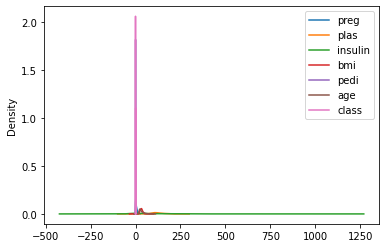

In [14]:
data.plot.kde()

##After Scaling

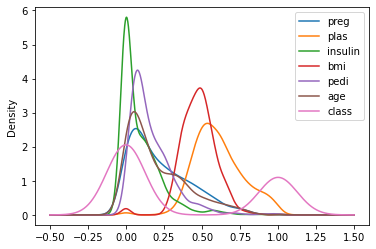

In [15]:
from sklearn.preprocessing import MinMaxScaler
mima = MinMaxScaler()
data = mima.fit_transform(data)
data = pd.DataFrame( data, columns = ['preg', 'plas', 'insulin', 'bmi', 'pedi', 'age', 'class'] )
data.plot.kde()

In [11]:
data.describe()

,preg,plas,insulin,bmi,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
features = data[['preg', 'plas', 'insulin', 'bmi', 'pedi', 'age']].values
target = data[['class']].values

##Train_Test_Split

In [18]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split( features, target , test_size = 0.2, random_state = 0 )

##Model Building

In [21]:
model = DecisionTreeClassifier()
model.fit(features_train, target_train)
prediction = model.predict(features_test)
actual = target_test

##Model Evaluation

In [22]:
print('The confusion matrix for the given model is :')
print( confusion_matrix(actual, prediction) )
print('The accuracy score of the model is: ', accuracy_score(actual, prediction))

The confusion matrix for the given model is :
[[90 17]
 [17 30]]
The accuracy score of the model is:  0.7792207792207793


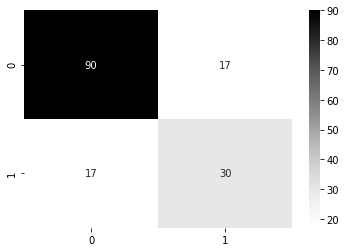

In [23]:
import seaborn as sns 
sns.heatmap( confusion_matrix(actual, prediction), annot = True , cmap = 'Greys' )

##Visualization of Decision Tree

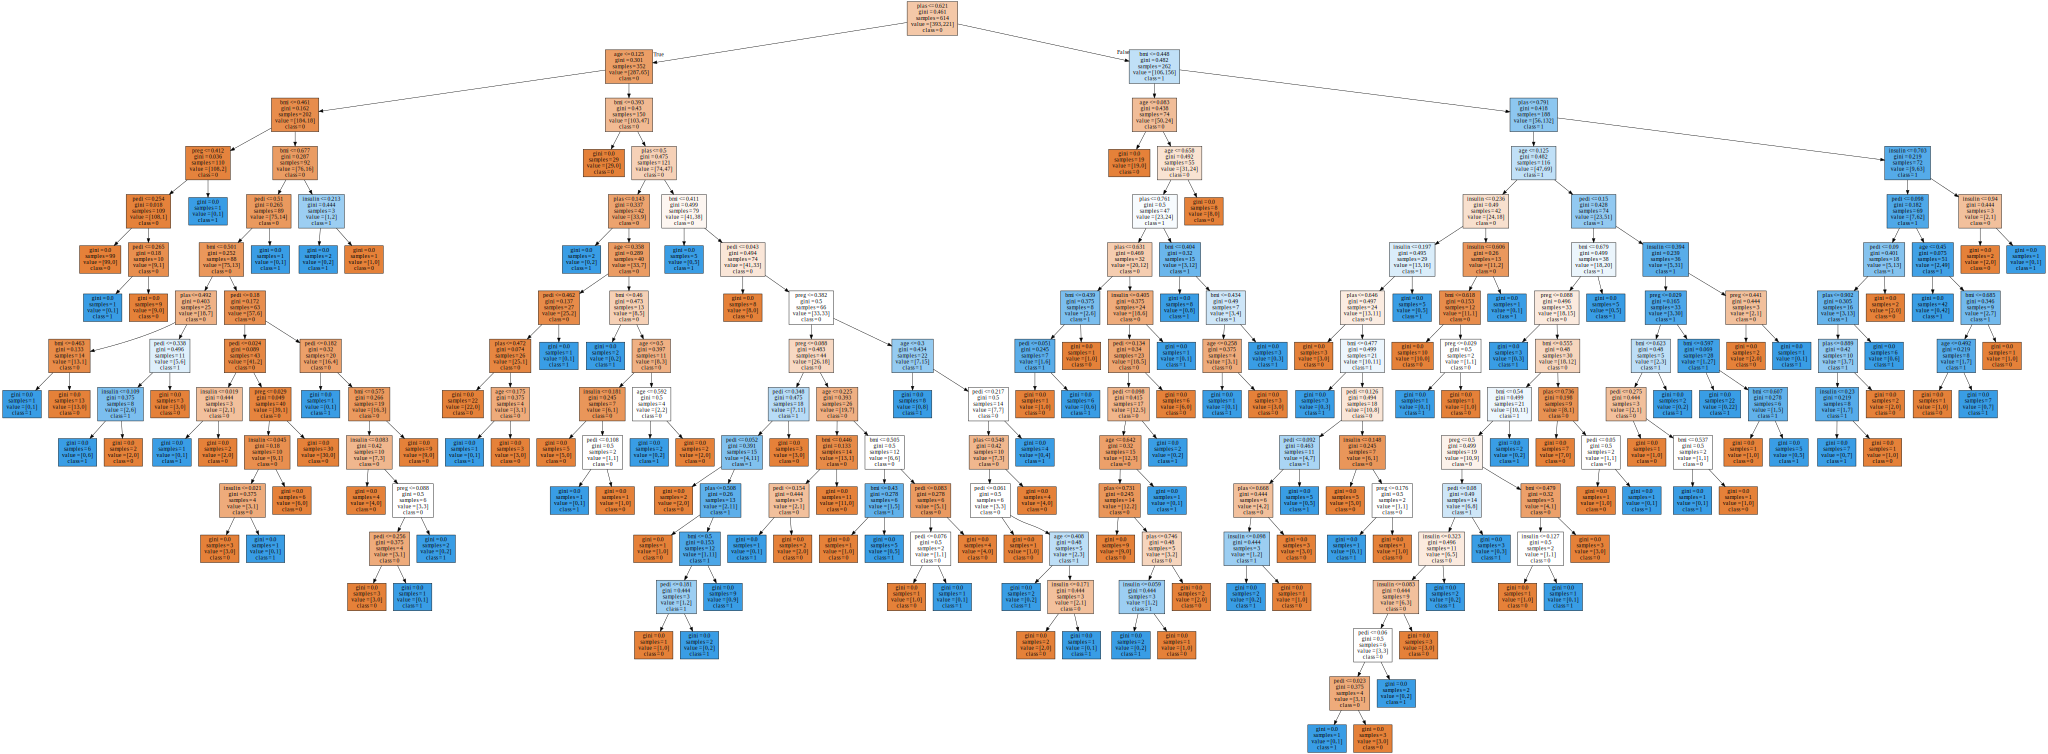

In [37]:
import graphviz
from sklearn.tree import export_graphviz
# DOT data
dot_data = export_graphviz(model, out_file=None, 
                                feature_names= ['preg', 'plas', 'insulin', 'bmi', 'pedi', 'age'],  
                                class_names= ['0','1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph